In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (60000, 235)
Test data shape: (10000, 234)


In [4]:
test.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,X5gsdTWGS3W7JJQB,1,13,18634,2,4,2,1857,2,NaN,...,7,21,1,129,1,3991,1,8409,1,105.462231
1,BTshNOJyKHnT2YIT,8,7,20199,10,3,2,16011,2,NaN,...,18,44,1,67,1,1950,1,10725,1,100.819809
2,dhdymr0lV8N5kZOT,8,12,19769,4,4,10,18294,2,NaN,...,0,3,1,35,1,3707,1,19459,1,259.800543
3,VEwyGGMcD56w5BOc,10,7,20479,19,2,0,17837,2,NaN,...,16,60,1,144,1,6487,1,29400,1,22.941906
4,wmUeMoJZfsqaSX9b,8,3,18164,13,0,2,13272,2,NaN,...,4,18,1,76,1,1346,1,3280,1,181.213095


In [5]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
train.total_price.describe()

count    6.000000e+04
mean     1.293727e+07
std      5.522463e+07
min      2.261495e+05
25%      2.433114e+06
50%      5.240482e+06
75%      1.123932e+07
max      5.088279e+09
Name: total_price, dtype: float64

Skew is: 40.18398482578027


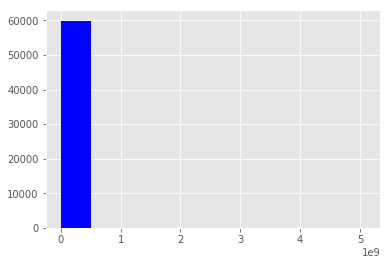

In [7]:
print ("Skew is:", train.total_price.skew())
plt.hist(train.total_price, color='blue')
plt.show()

Skew is: 0.3755626615001688


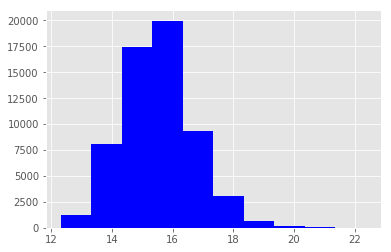

In [8]:
target = np.log(train.total_price)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [9]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

building_material            int64
city                         int64
txn_dt                       int64
total_floor                  int64
building_type                int64
building_use                 int64
building_complete_dt         int64
parking_way                  int64
parking_area               float64
parking_price              float64
txn_floor                  float64
land_area                  float64
building_area              float64
town                         int64
lat                        float64
lon                        float64
village_income_median      float64
town_population            float64
town_area                  float64
town_population_density    float64
doc_rate                   float64
master_rate                float64
bachelor_rate              float64
jobschool_rate             float64
highschool_rate            float64
junior_rate                float64
elementary_rate            float64
born_rate                  float64
death_rate          

In [10]:
corr = numeric_features.corr()
print (corr['total_price'].sort_values(ascending=False)[:10], '\n')
print (corr['total_price'].sort_values(ascending=False)[-10:])

total_price       1.000000
building_area     0.459167
parking_price     0.458674
parking_area      0.377045
land_area         0.313409
master_rate       0.168603
bachelor_rate     0.168585
doc_rate          0.165599
XIII_5000         0.161861
jobschool_rate    0.150532
Name: total_price, dtype: float64 

VII_index_10000    NaN
VIII_index_5000    NaN
VIII_index_10000   NaN
IX_index_10000     NaN
X_index_5000       NaN
X_index_10000      NaN
XII_index_5000     NaN
XII_index_10000    NaN
XIV_index_5000     NaN
XIV_index_10000    NaN
Name: total_price, dtype: float64


In [11]:
train.total_price.unique()

array([  647603.77047198,  3321452.        ,  9570885.31620637, ...,
        2746688.93527209, 22661350.44357192, 15725223.99745048])

In [12]:
#quality_pivot = train.pivot_table(index='building_id',
                  #values='total_price', aggfunc=np.median)

In [13]:
#quality_pivot

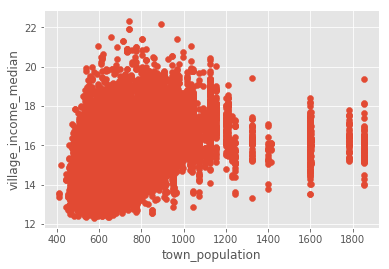

In [14]:
plt.scatter(x=train['village_income_median'], y=target)
plt.ylabel('village_income_median')
plt.xlabel('town_population')
plt.show()

In [15]:
train = train[train['village_income_median'] < 1200]

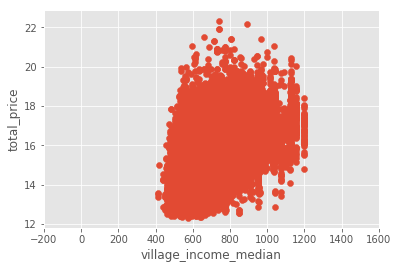

In [16]:
plt.scatter(x=train['village_income_median'], y=np.log(train.total_price))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('total_price')
plt.xlabel('village_income_median')
plt.show()

In [17]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
parking_area,55387
parking_price,44910
txn_floor,15274
total_price,0
III_index_10000,0
III_5000,0
III_index_5000,0
III_10000,0
III_MIN,0


In [18]:
print ("Unique values are:", train.total_price.unique())

Unique values are: [  647603.77047198  3321452.          9570885.31620637 ...
  1021149.81120992 22661350.44357192 15725223.99745048]


In [19]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,building_id
count,58377
unique,58377
top,bG2o0f0pJ8J01rgM
freq,1


In [20]:
print ("Original: \n")
print (train.town.value_counts(), "\n")

Original: 

180    2595
13     2232
10     2059
158    1763
164    1630
17     1459
208    1428
188    1319
39     1302
204    1288
6      1271
101    1258
330    1146
284    1130
34     1088
84     1080
290    1006
196     986
174     982
148     960
91      910
61      881
53      879
179     836
62      828
52      810
214     797
50      741
15      733
136     726
       ... 
316       7
43        7
268       6
307       6
240       6
239       6
123       6
182       5
89        5
271       4
198       4
195       4
131       3
107       3
31        3
248       3
141       3
263       3
234       2
46        2
143       2
175       2
64        2
261       2
232       1
300       1
40        1
223       1
59        1
255       1
Name: town, Length: 211, dtype: int64 



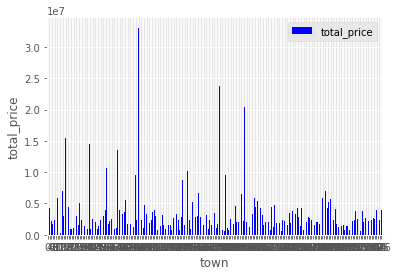

In [21]:
condition_pivot = train.pivot_table(index='town', values='total_price', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('town')
plt.ylabel('total_price')
plt.xticks(rotation=0)
plt.show()

In [22]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [23]:
sum(data.isnull().sum() != 0)

0

In [24]:
y = np.log(train.total_price)
X = train[['building_area','land_area','master_rate','bachelor_rate','doc_rate','XIII_5000','jobschool_rate']]
print(y.shape)
print(X.shape)

(58377,)
(58377, 7)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
lr = RandomForestRegressor(n_estimators=1000,random_state=42)

In [34]:
model = lr.fit(X_train, y_train)

In [35]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8881393596554733


In [36]:
predictions = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.15142895280165578


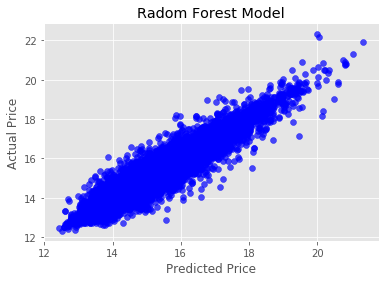

In [38]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Radom Forest Model')
plt.show()

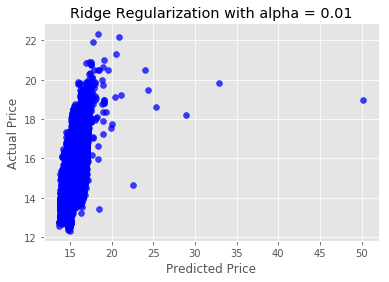

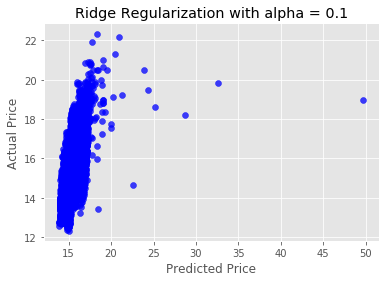

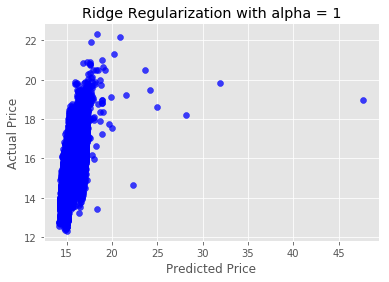

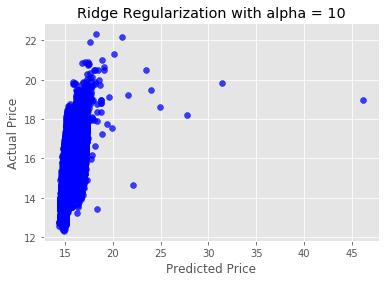

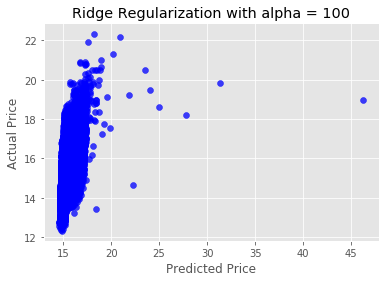

In [40]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [41]:
submission = pd.DataFrame()
submission['building_id'] = test.building_id

In [42]:
feats = test[['building_area','land_area','master_rate','bachelor_rate','doc_rate','XIII_5000','jobschool_rate']]

print(feats.shape)
print(predictions.shape)

(10000, 7)
(19265,)


In [43]:
predictions = model.predict(feats)

In [44]:
final_predictions = np.exp(predictions)

In [45]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [16.29215269 15.12870982 15.45154178 15.18169412 14.12547964] 

Final predictions are: 
 [11901234.47091235  3718049.7179546   5134750.35335489  3920360.30264207
  1363382.96154066]


In [46]:
submission['total_price'] = final_predictions
submission.head()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.190123e+07
1,BTshNOJyKHnT2YIT,3.718050e+06
2,dhdymr0lV8N5kZOT,5.134750e+06
3,VEwyGGMcD56w5BOc,3.920360e+06
4,wmUeMoJZfsqaSX9b,1.363383e+06


In [ ]:
submission.to_csv('submit_test.csv', index=False)